## Price Prediction for workstation trips:

### Problem Statement
What is Workathon?

Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team. In other words, A workcation (sometimes written as workation) is a type of vacation where employees work remotely from a different location, such as a vacation rental, hotel, or even their own home.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the Dataset
train = pd.read_csv("Train.w.csv")
test = pd.read_csv("Test.w.csv")
train.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [3]:
# Combine the Dataset
combined = pd.concat([train, test], ignore_index = False)

train.shape, test.shape, combined.shape

((21000, 15), (9000, 14), (30000, 15))

In [32]:
combined.select_dtypes(include=np.number).columns

Index(['Flight Stops', 'Meals', 'Per Person Price', 'Day', 'Month', 'Year',
       'Count_Locs'],
      dtype='object')

In [33]:
combined.select_dtypes(include="object").columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Hotel Details', 'Start City', 'Airline',
       'Sightseeing Places Covered', 'Cancellation Rules', 'Season',
       'Day_Season', 'Flights', 'Flight_Cat'],
      dtype='object')

In [34]:
combined.describe()

,Flight Stops,Meals,Per Person Price,Day,Month,Year,Count_Locs
count,30000.000000,30000.000000,21000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.873500,3.664200,20059.330381,15.725733,6.630800,2021.039767,2.551467
std,0.837091,0.893979,11643.641766,8.813957,3.104912,0.195414,1.292855
min,0.000000,2.000000,791.000000,1.000000,1.000000,2021.000000,1.000000
25%,0.000000,3.000000,12461.000000,8.000000,4.000000,2021.000000,1.000000
50%,1.000000,3.000000,17765.500000,16.000000,7.000000,2021.000000,2.000000
75%,2.000000,5.000000,25081.375000,23.000000,9.000000,2021.000000,3.000000
max,2.000000,5.000000,171062.500000,31.000000,12.000000,2022.000000,11.000000


In [35]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 8999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Uniq Id                     30000 non-null  object        
 1   Package Name                30000 non-null  object        
 2   Package Type                30000 non-null  object        
 3   Destination                 30000 non-null  object        
 4   Itinerary                   30000 non-null  object        
 5   Places Covered              30000 non-null  object        
 6   Travel Date                 30000 non-null  datetime64[ns]
 7   Hotel Details               30000 non-null  object        
 8   Start City                  30000 non-null  object        
 9   Airline                     30000 non-null  object        
 10  Flight Stops                30000 non-null  int64         
 11  Meals                       30000 non-null  int64      

In [ ]:
## feature engineering

In [4]:
# Split the Date Component into Date, Month and Year
combined["Travel Date"] = pd.to_datetime(combined["Travel Date"], 
                                         dayfirst = True)

In [5]:
combined["Day"] = combined["Travel Date"].dt.day
combined["Month"] = combined["Travel Date"].dt.month
combined["Year"] = combined["Travel Date"].dt.year

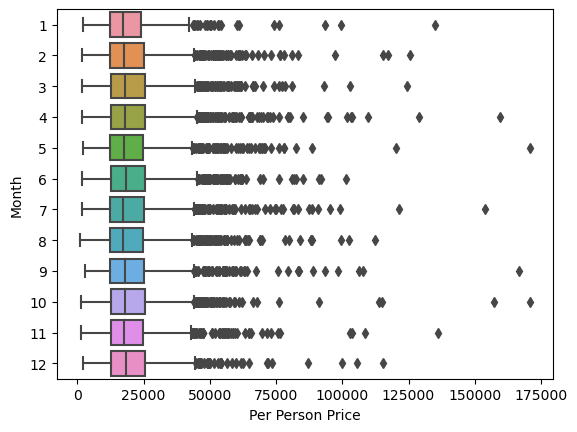

In [6]:
sns.boxplot(y = "Month", x  ="Per Person Price", 
            data = combined, orient = "h")
plt.show()

# Jan, April, may, July, Sept, Oct and Nov 

In [7]:
# Creating feature season showing normal and  peak months 
# peak months : Jan, April, may, July, Sept, Oct and Nov

combined["Season"]=  combined.Month.apply(lambda x:"Peak_Month" \
                     if x in [1, 4, 5, 7, 9, 10, 11]
                    else "Normal")

In [8]:
combined["Season"]

0       Peak_Month
1           Normal
2       Peak_Month
3           Normal
4           Normal
           ...    
8995        Normal
8996        Normal
8997        Normal
8998        Normal
8999        Normal
Name: Season, Length: 30000, dtype: object

<Axes: xlabel='Season', ylabel='Per Person Price'>

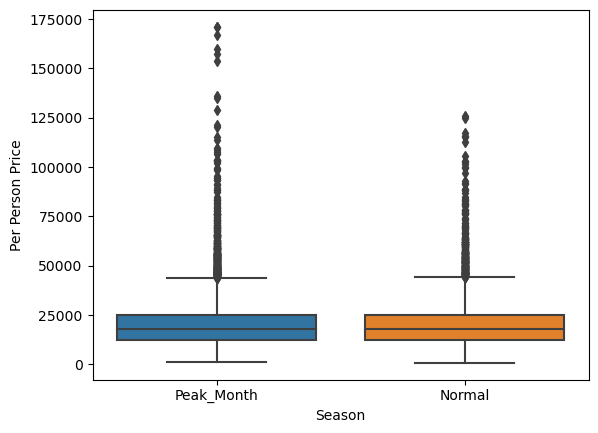

In [9]:
sns.boxplot(x = "Season", 
            y = "Per Person Price", 
            data = combined)

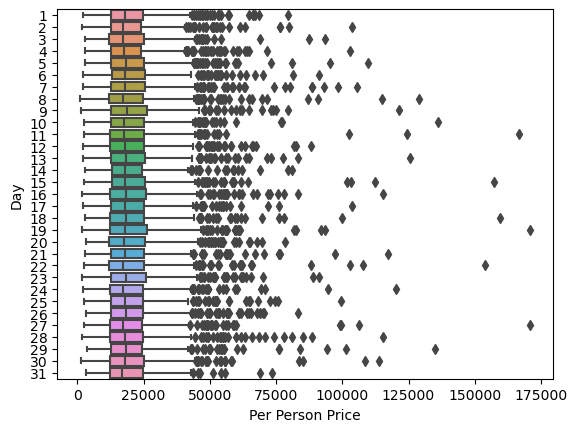

In [10]:
sns.boxplot(y = "Day", x  ="Per Person Price", 
            data = combined, orient = "h")
plt.show() # 5, 8, 10, 11, 15, 18, 19, 27, 29 and 30

In [12]:
# Feature day_season 
# Jan, April, may, July, Sept, Oct and Nov

combined["Day_Season"]=  combined.Day.apply(lambda x:"Peak_Days" \
                     if x in [5, 8, 10, 11, 15, 
                              18, 19, 27, 29, 30]
                    else "Normal_Days")

<Axes: xlabel='Day_Season', ylabel='Per Person Price'>

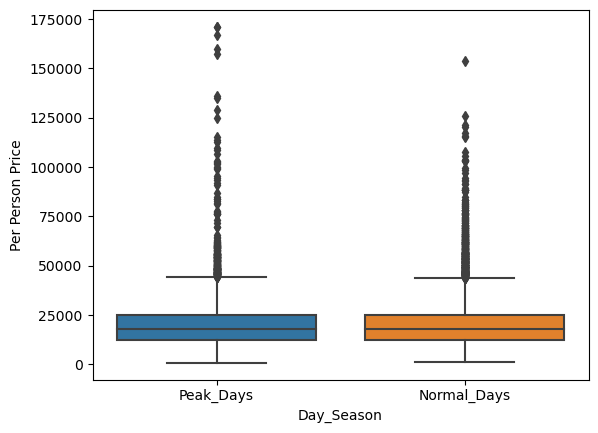

In [13]:
sns.boxplot(x = "Day_Season", 
            y = "Per Person Price", 
            data = combined)

In [14]:
combined.head(1)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price,Day,Month,Year,Season,Day_Season
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0,30,7,2021,Peak_Month,Peak_Days


In [16]:
# Check meals and Airline...
combined.Airline.str.split("|", 
                                                 expand = True)[0]

0       Not Available
1              IndiGo
2              IndiGo
3              IndiGo
4            Spicejet
            ...      
8995          Vistara
8996           IndiGo
8997          Vistara
8998           IndiGo
8999           IndiGo
Name: 0, Length: 30000, dtype: object

In [17]:
combined["Flights"] = combined.Airline.str.split("|", 
                                                 expand = True)[0]

In [18]:
flight = combined.Flights.value_counts()[:5].index.to_list()

In [19]:
combined["Flight_Cat"] = combined.Flights.apply(lambda x:"Top5" 
                                                if x in flight 
                                                else "Others")

<Axes: xlabel='Flight_Cat', ylabel='Per Person Price'>

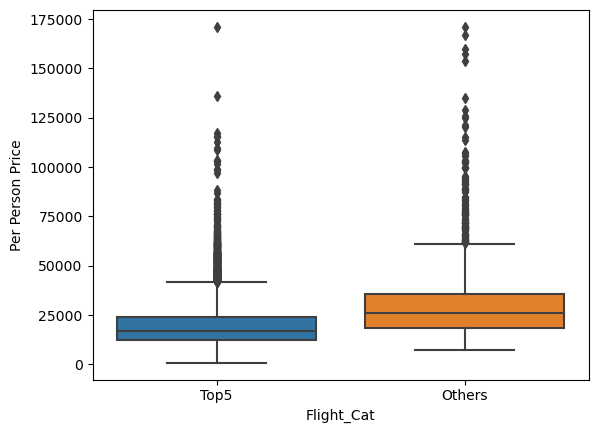

In [20]:
sns.boxplot(x = "Flight_Cat", 
            y = "Per Person Price", 
            data = combined)

In [36]:
combined.Flights.value_counts()[:5]

IndiGo           8554
Not Available    7010
Spicejet         6587
Go Air           3798
Vistara          1336
Name: Flights, dtype: int64

In [39]:
# places covered
combined["Places Covered"].str.split("|", expand = True).iloc[:,0:4]

,0,1,2,3
0,New Delhi,Shimla,Manali,Chandigarh
1,Srinagar,Pahalgam,Srinagar,None
2,Udaipur,Chittorgarh,None,None
3,Munnar,Kumarakom,Allepey,Kovalam and Poovar
4,Pattaya,Bangkok,None,None
...,...,...,...,...
8995,Munnar,Thekkady,Allepey,None
8996,Srinagar,Pahalgam,Srinagar,Gulmarg
8997,Dharamshala,Dalhousie,None,None
8998,Jaipur,Jodhpur,Jaisalmer,Udaipur


In [22]:
# count of locations
combined["Count_Locs"]=  combined["Places Covered"].\
apply(lambda x:len(x.split("|")))

In [37]:
combined["Count_Locs"]

0       4
1       3
2       2
3       4
4       2
       ..
8995    3
8996    4
8997    2
8998    4
8999    1
Name: Count_Locs, Length: 30000, dtype: int64

<Axes: xlabel='Meals', ylabel='Per Person Price'>

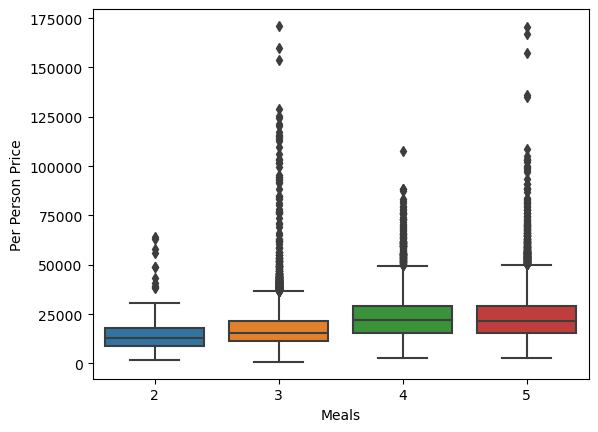

In [23]:
# meals
sns.boxplot(x = "Meals", 
            y = "Per Person Price", 
            data = combined)

In [42]:
# itenary
combined.Itinerary.str.split(".", expand = True).iloc[:, 0:4]

,0,1,2,3
0,1N New Delhi,2N Shimla,2N Manali,1N Chandigarh
1,1N Srinagar,2N Pahalgam,1N Srinagar,None
2,2N Udaipur,1N Chittorgarh,None,None
3,2N Munnar,1N Kumarakom,1N Allepey,2N Kovalam and Poovar
4,4N Pattaya,3N Bangkok,None,None
...,...,...,...,...
8995,2N Munnar,1N Thekkady,1N Allepey,None
8996,1N Srinagar,1N Pahalgam,1N Srinagar,1N Gulmarg
8997,3N Dharamshala,2N Dalhousie,None,None
8998,2N Jaipur,1N Jodhpur,2N Jaisalmer,2N Udaipur


In [27]:
df = pd.DataFrame(combined.Itinerary.str.split(".", expand = True)[0].str.split("", 
                                                              expand = True))

In [29]:
df[0].str.split("N", expand = True)[0]

0        
1        
2        
3        
4        
       ..
8995     
8996     
8997     
8998     
8999     
Name: 0, Length: 30000, dtype: object

In [31]:
df[2].str.split("N", expand = True)[0]

0        
1        
2        
3        
4        
       ..
8995     
8996     
8997     
8998     
8999     
Name: 0, Length: 30000, dtype: object

In [43]:
list_m=[]
for i in range (0,11):
    saved=combined.Itinerary.str.split(".",expand=True)[i].str.\
    split("N",expand=True)[0].apply(lambda x:0 if x==None else x).astype(int)
    list_m.append(saved)

In [44]:
# total travel days from itenary feature
combined["Total_travel_day"]=pd.concat(list_m,axis=1).sum(axis=1)

<Axes: xlabel='Total_travel_day', ylabel='Per Person Price'>

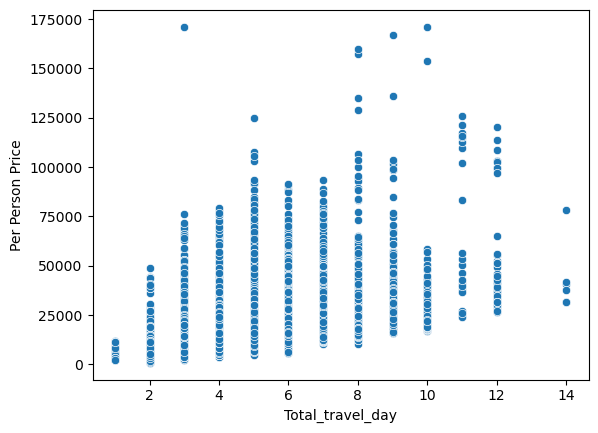

In [47]:
sns.scatterplot(x = "Total_travel_day", y = "Per Person Price", 
              data = combined)

In [48]:
combined.Total_travel_day.describe()

count    30000.000000
mean         4.722133
std          1.792381
min          1.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         14.000000
Name: Total_travel_day, dtype: float64

In [49]:
ratings = []
for i in range(0, 10):
    saved = combined["Hotel Details"].str.split(":", expand = True)[i].\
    str.split("|", expand = True)[0].apply(lambda x: 0 if x is None else x)
    ratings.append(saved)

In [50]:
pd.concat(ratings, ignore_index = True)

0                                             Not Available
1                                 The Orchard Retreat & Spa
2                                                The Ananta
3         Elixir Hills Suites Resort & Spa-MMT Holidays ...
4                         Dusit Thani Pattaya - MMT Special
                                ...                        
299995                                                    0
299996                                                    0
299997                                                    0
299998                                                    0
299999                                                    0
Name: 0, Length: 300000, dtype: object

In [51]:
ratings = []
for i in range(0, 10):
    ratings.append(combined["Hotel Details"].\
                   str.split("|", expand = True)\
    [i].str.split(":", expand = True)[1].\
                   apply(lambda x:0 if x is None else x))

In [52]:
combined["ratings"] = pd.concat(ratings, ignore_index = True)

In [53]:
combined.ratings.replace(to_replace = ["Four", "Three", 
                                      "Five", 'Two', 
                                      'A member of The Leading Hotels Of The World'],
                        value =["4", "3", "5", "2", "0"], inplace = True)

In [54]:
combined["ratings"]=pd.to_numeric(combined.ratings)

In [55]:
combined.ratings.fillna(0, inplace = True)

In [56]:
combined["Count_Sightseeing"] = combined["Sightseeing Places Covered"].\
apply(lambda x:0 if x =="Not Available" \
else len(x.split("|")))

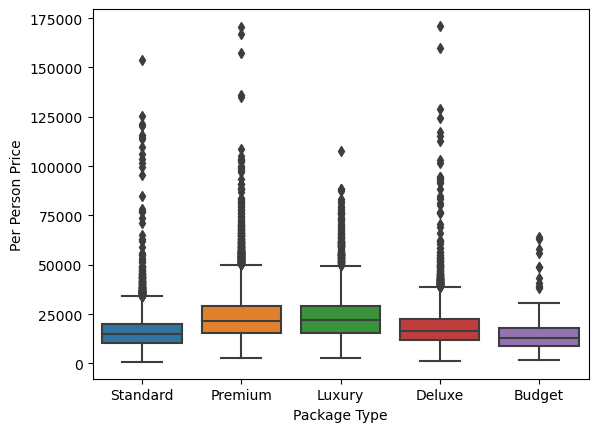

In [57]:
sns.boxplot(x = "Package Type", 
            y = "Per Person Price",
           data = combined)
plt.show()

In [58]:
combined.groupby("Package Type")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [59]:
dict_ = {"Luxury": 5, "Premium": 4, 
         "Deluxe": 3, "Standard":2, "Budget":1}

combined["Package Type"] = combined["Package Type"].map(dict_)        

In [60]:
#combined["Destination"].apply(lambda x: len(x.split("|")))
# Hotel Count
combined["Hotel_Count"] = combined["Hotel Details"].\
apply(lambda x: 0 if x=="Not Available" else len(x.split("|")))

In [61]:
newdata = combined.drop(['Uniq Id', 'Package Name',
                         'Destination', 
                         'Itinerary','Places Covered',"Flights", 
                         'Travel Date', 'Hotel Details',"Start City",
                         'Airline', 'Sightseeing Places Covered',
       'Cancellation Rules'], axis = 1)

In [62]:
newdata.shape

(30000, 15)

In [63]:
# Split the Data in Train and Test

newtrain = newdata.iloc[0:train.shape[0], :]
newtest = newdata.iloc[train.shape[0]:, :]

newtrain.shape, newtest.shape, train.shape, test.shape

((21000, 15), (9000, 15), (21000, 15), (9000, 14))

In [64]:
# Per Person Stats basis Package Type

newtrain.groupby("Package Type")["Per Person Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
1,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
2,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0
3,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
4,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
5,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0


In [65]:
newtrain["Package_Count"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("count")

newtest["Package_Count"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("count")

newtrain["Package_Min"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("min")

newtest["Package_Min"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("min")


newtrain["Package_Max"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("max")

newtest["Package_Max"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("max")

newtrain["Package_Mean"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("mean")

newtest["Package_Mean"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("mean")

newtrain["Package_Median"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("median")

newtest["Package_Median"] = newtrain.groupby("Package Type")\
["Per Person Price"].transform("median")

In [66]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 0 to 20999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Package Type       21000 non-null  int64  
 1   Flight Stops       21000 non-null  int64  
 2   Meals              21000 non-null  int64  
 3   Per Person Price   21000 non-null  float64
 4   Day                21000 non-null  int64  
 5   Month              21000 non-null  int64  
 6   Year               21000 non-null  int64  
 7   Season             21000 non-null  object 
 8   Day_Season         21000 non-null  object 
 9   Flight_Cat         21000 non-null  object 
 10  Count_Locs         21000 non-null  int64  
 11  Total_travel_day   21000 non-null  int64  
 12  ratings            21000 non-null  float64
 13  Count_Sightseeing  21000 non-null  int64  
 14  Hotel_Count        21000 non-null  int64  
 15  Package_Count      21000 non-null  int64  
 16  Package_Min        210

In [67]:
newtest.drop("Per Person Price", axis = 1, inplace = True)

dummytrain = pd.get_dummies(newtrain, drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

X = dummytrain.drop("Per Person Price", axis = 1)
y = dummytrain["Per Person Price"]

In [68]:
dummytrain.shape, dummytest.shape

((21000, 20), (9000, 19))

In [69]:
# Modelling

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [70]:
# Base Models

def base_models():
    models = dict()
    models["LR"] = LinearRegression()
    models["DTree"] = DecisionTreeRegressor()
    models["RF"] = RandomForestRegressor()
    models["GBM"] = GradientBoostingRegressor()
    models["XGB"] = XGBRegressor()
    return models

In [71]:
# Function to evaluate the models...
from sklearn.model_selection import KFold, cross_val_score

def eval_models(model):
    cv = KFold(n_splits=5, shuffle = True, random_state = 1001)
    scores = -cross_val_score(estimator = model, X = X, 
                             y = y, cv = cv,
                            scoring="neg_mean_squared_error",
                            n_jobs=-1)
    return scores
    


In [72]:
# Lets use the functions to calculate the scores...

models = base_models()

result, names = list(), list()

for name, mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name, np.mean(result))

LR 77063864.06682393
DTree 84071472.34699829
RF 72535221.06043676
GBM 69099961.14672653
XGB 65349127.615614384


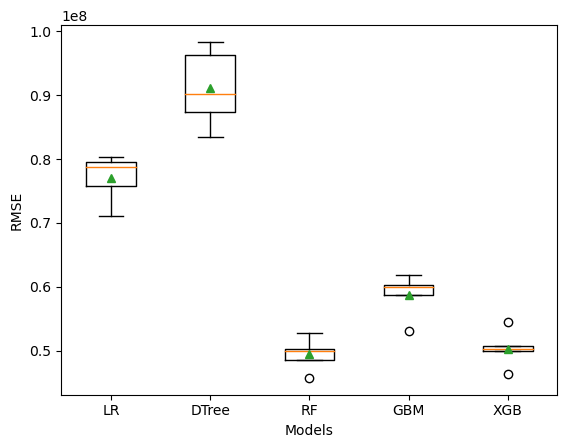

In [73]:
# Plot the results...

plt.boxplot(result, labels = names, showmeans = True)
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.show()

In [74]:
# Stacking Regressor
from sklearn.ensemble import StackingRegressor
GBM = GradientBoostingRegressor()
XGB = XGBRegressor()
RF = RandomForestRegressor()
# ('lr', RidgeCV()),('svr', LinearSVR(dual="auto", random_state=42))
stack = StackingRegressor(estimators = [('GBM', GBM), 
                                        ("RF", RF)], 
                         final_estimator=XGB,
                          cv = 5)

predictions = stack.fit(X, y).predict(dummytest)

In [75]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                               test_size = 0.20,
                                               random_state = 42)

xgb = XGBRegressor()

from sklearn.metrics import mean_squared_error

pred = xgb.fit(xtrain, ytrain).predict(xtest)

print((np.sqrt(np.log(mean_squared_error(ytest, pred)))))

4.222736610285257
